### Objective is to predict the car price
- Dataset : https://www.kaggle.com/hellbuoy/car-price-prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('datasets_383055_741735_CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
def get_unique_values(dataset):
    df = dataset.select_dtypes(include = np.object)
    cols = list(df.columns)
    for i in cols:
        print('{}: {}'.format(i,df[i].unique()), '\n')

In [7]:
get_unique_values(data)

CarName: ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick op

In [8]:
data_clean = data.copy(deep= True)
data_clean.drop(columns = ['car_ID','CarName'], axis = 1, inplace = True)
data_clean.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

### Data Exploration

In [9]:
data_clean.select_dtypes(include= [np.float, np.int64]).head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
data_clean.select_dtypes(include= np.object).head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [11]:
len(list(data_clean.columns))

24

In [12]:
df_numeric = data_clean.select_dtypes(include= [np.float, np.int64])
df_cat = data_clean.select_dtypes(include= np.object)

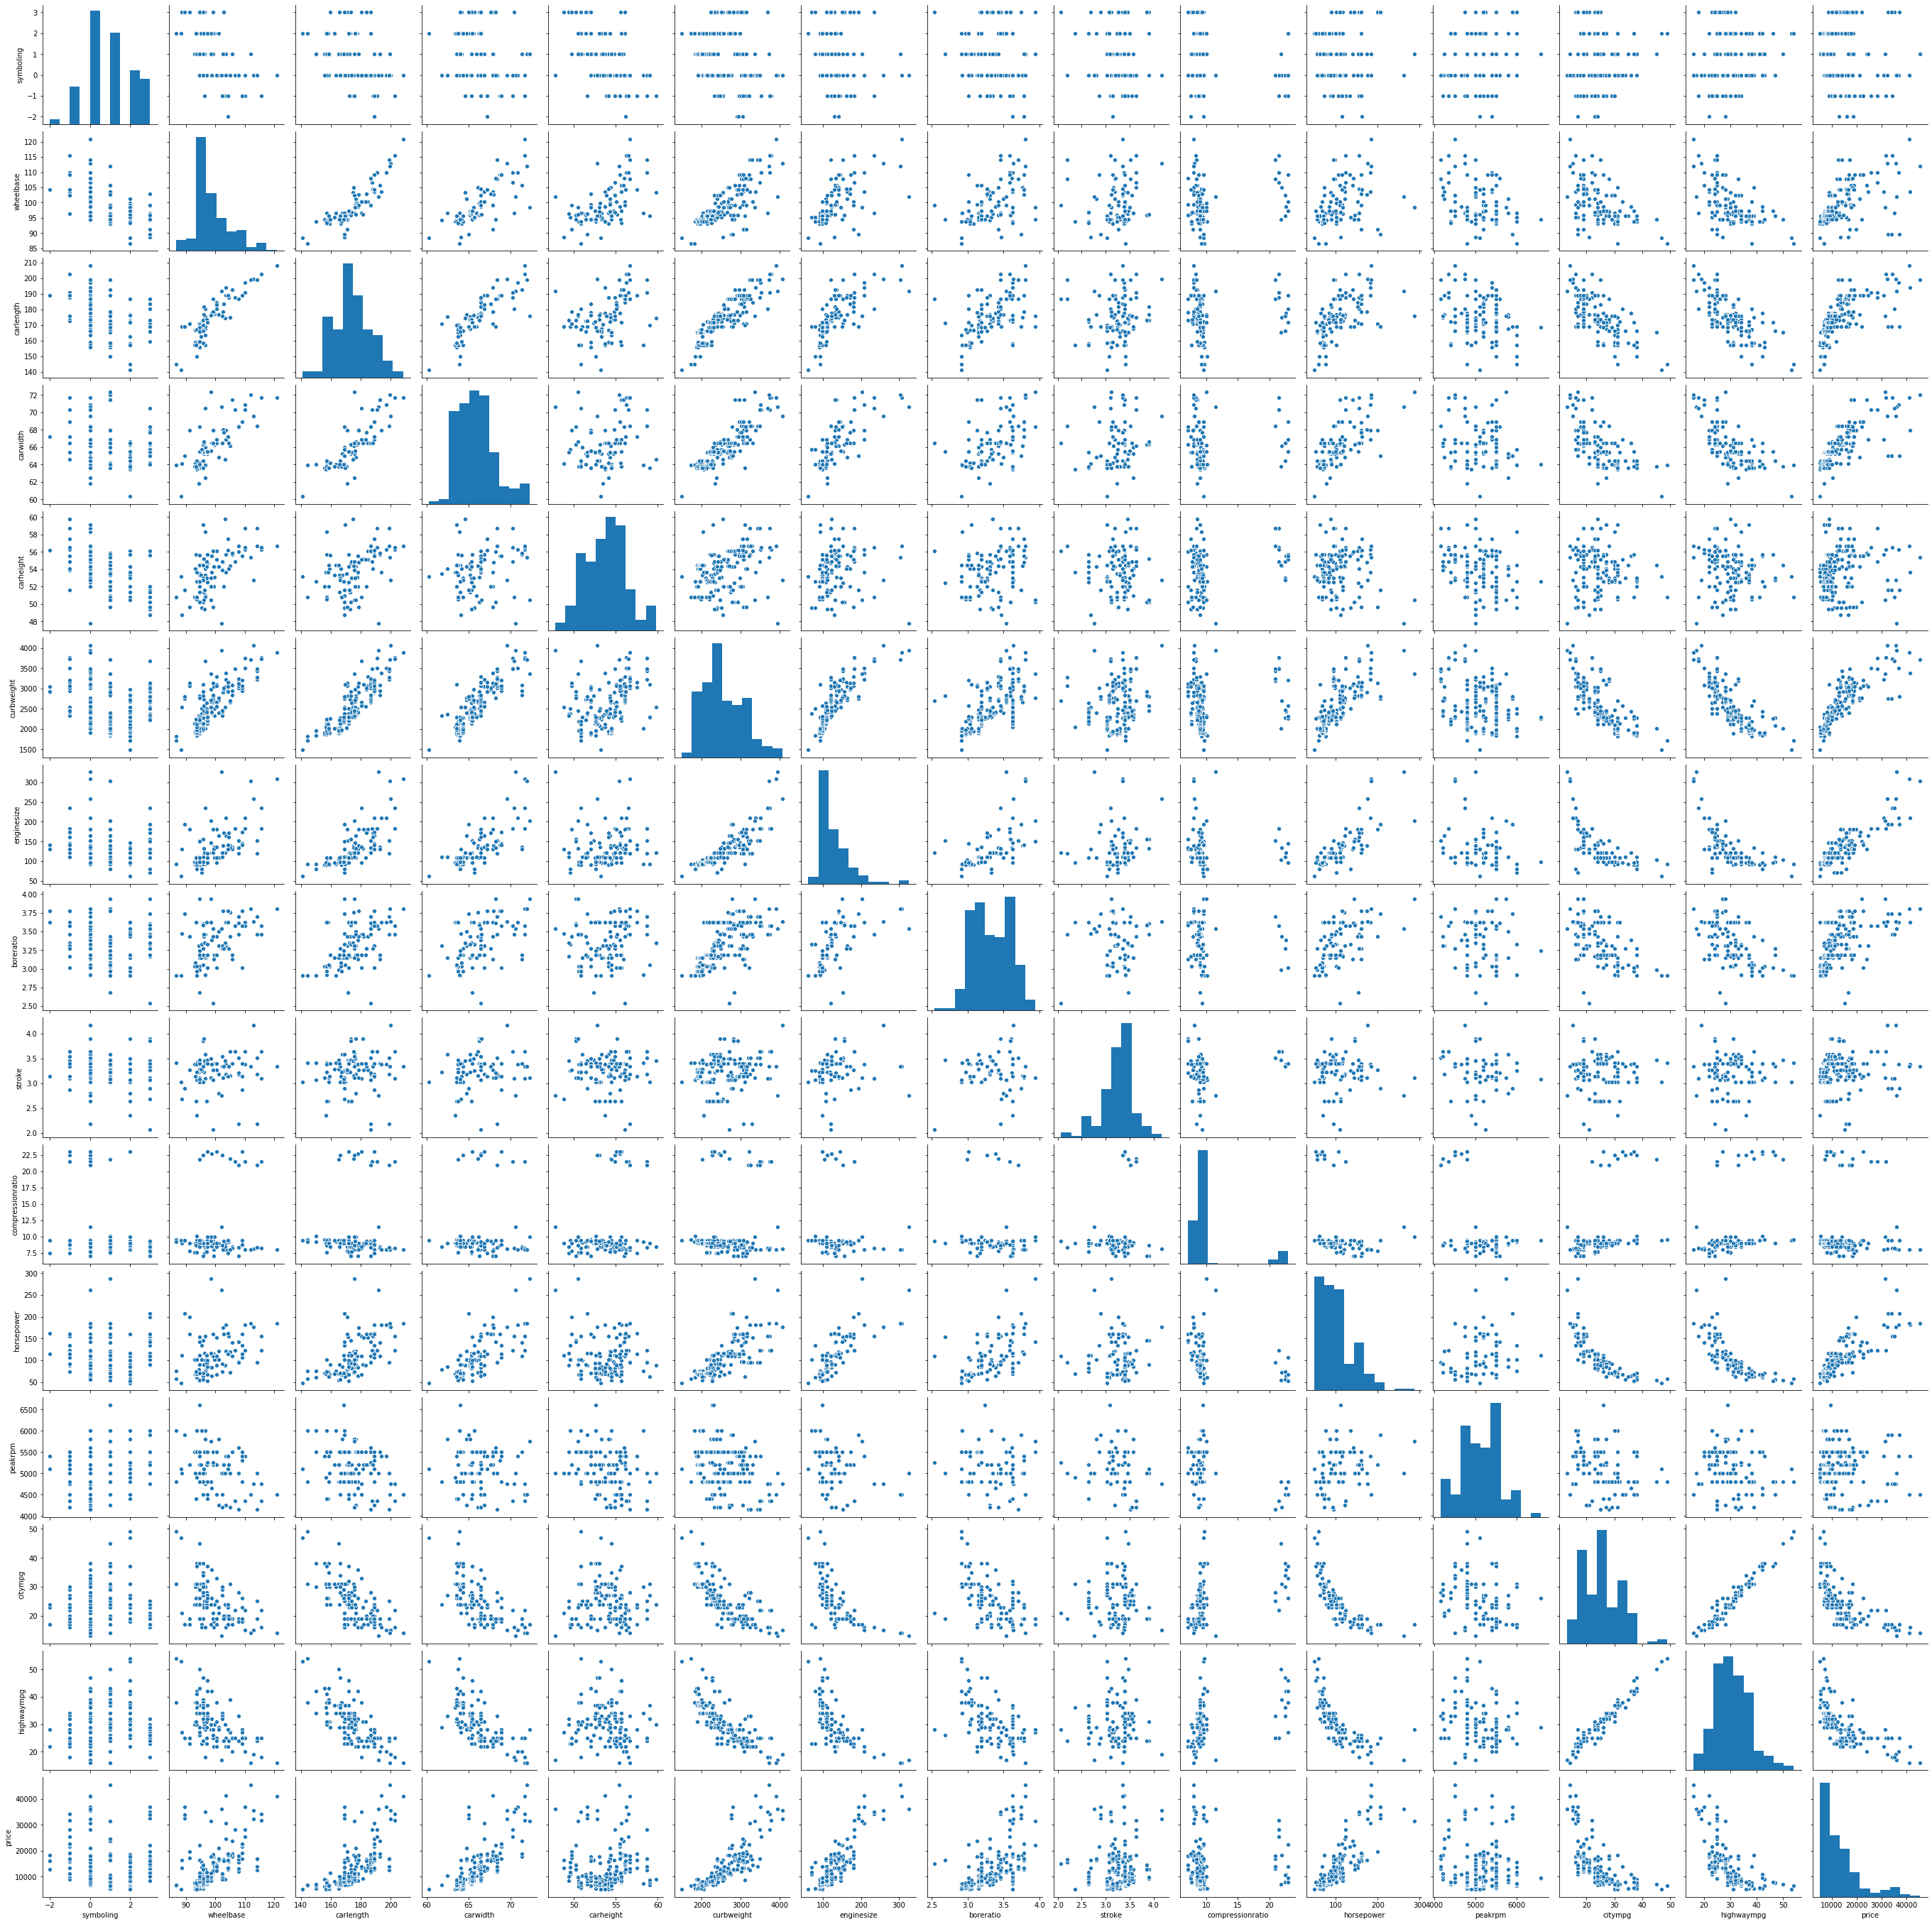

In [13]:
sns.pairplot(df_numeric)
plt.show()

In [14]:
df_cat.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

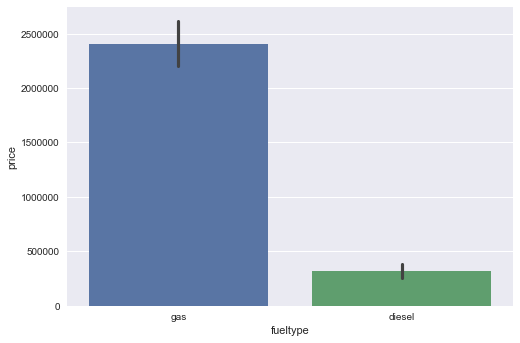

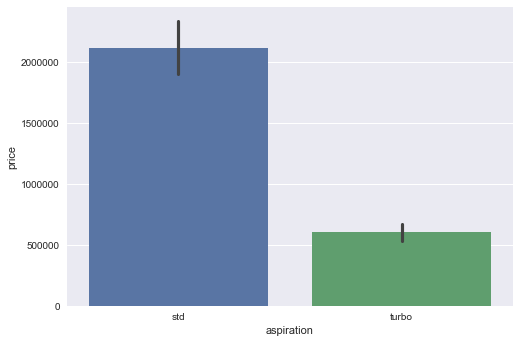

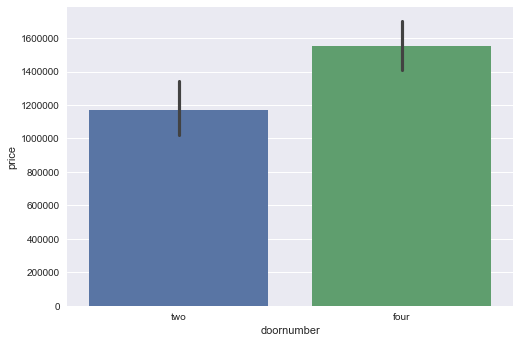

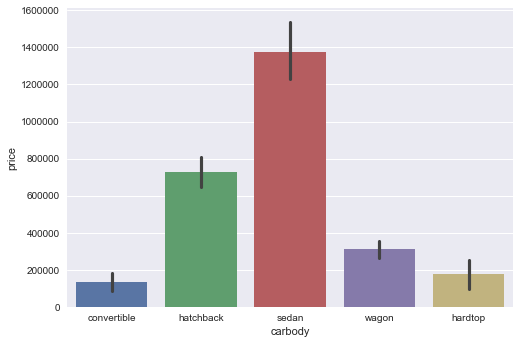

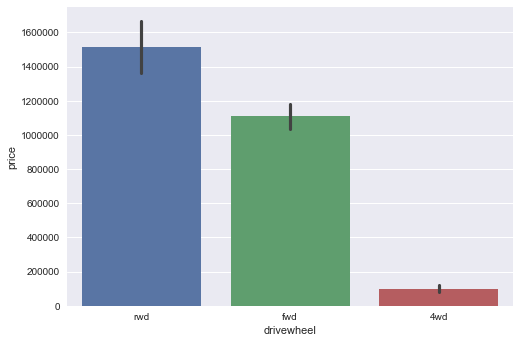

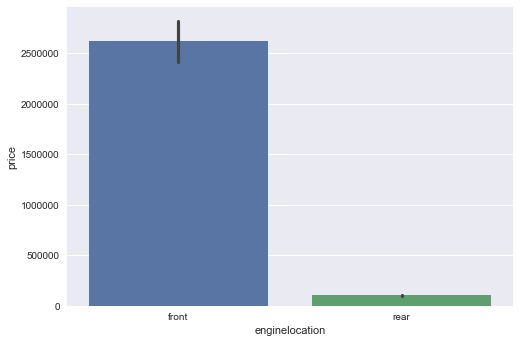

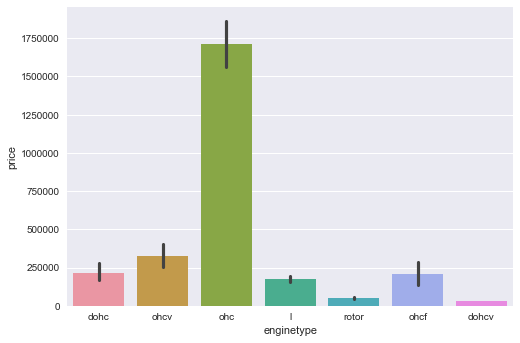

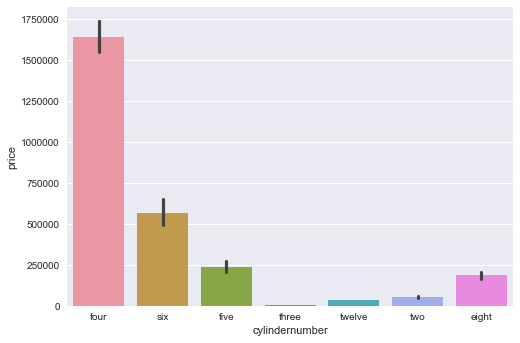

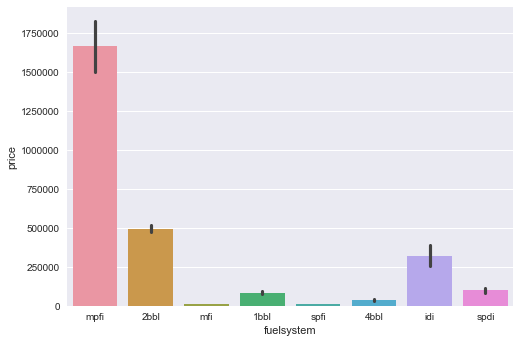

In [15]:
for i in list(df_cat.columns):
    plt.style.use('seaborn')
    sns.barplot(x = i, y = 'price', data = data_clean,estimator= sum )
    plt.show()

In [16]:
data_clean.groupby('fueltype')['price'].sum().sort_values(ascending = False)

fueltype
gas       2404962.667
diesel     316763.000
Name: price, dtype: float64

In [17]:
for i in list(df_cat.columns):
    print(pd.DataFrame(data_clean.groupby(i)['price'].sum().sort_values(ascending = False)), '\n')

                price
fueltype             
gas       2404962.667
diesel     316763.000 

                  price
aspiration             
std         2118693.500
turbo        603032.167 

                  price
doornumber             
four        1552632.500
two         1169093.167 

                   price
carbody                 
sedan        1377050.000
hatchback     726365.667
wagon         309299.000
hardtop       177668.000
convertible   131343.000 

                  price
drivewheel             
rwd         1513221.500
fwd         1108717.000
4wd           99787.167 

                      price
enginelocation             
front           2618141.667
rear             103584.000 

                  price
enginetype             
ohc         1712959.167
ohcv         326279.000
dohc         217397.000
ohcf         206079.000
l            175531.000
rotor         52080.000
dohcv         31400.500 

                      price
cylindernumber             
four            1635435.000

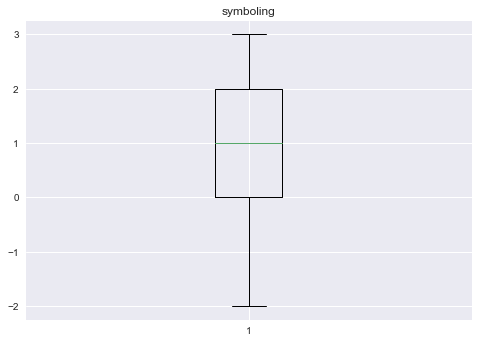

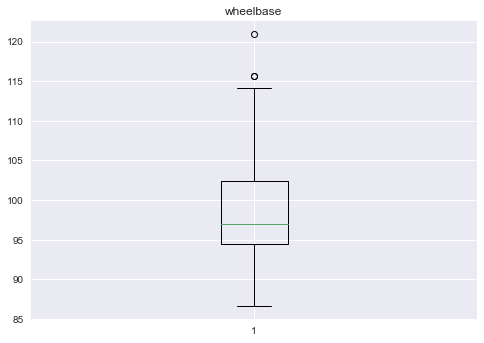

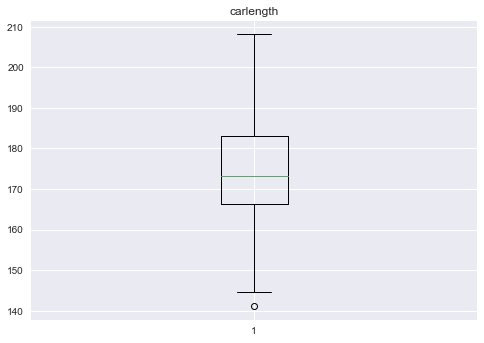

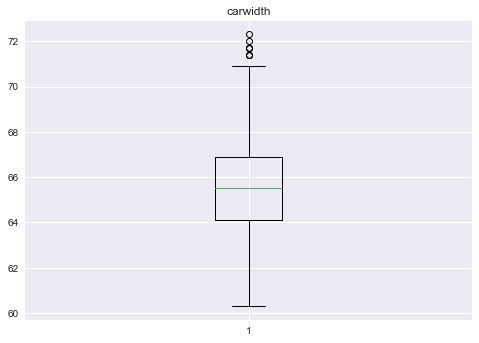

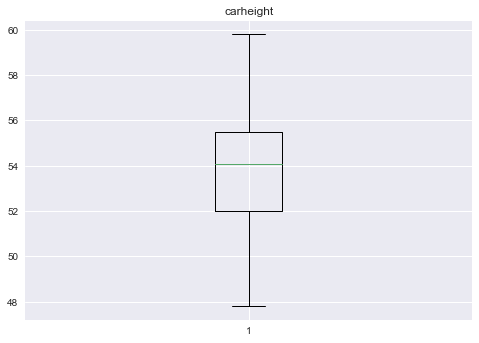

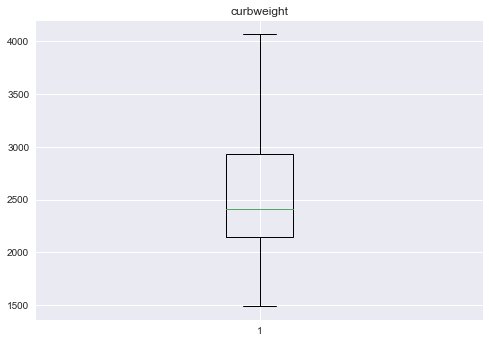

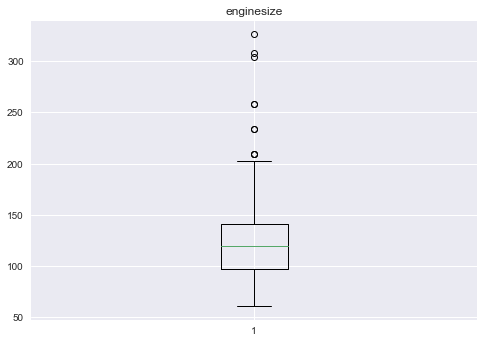

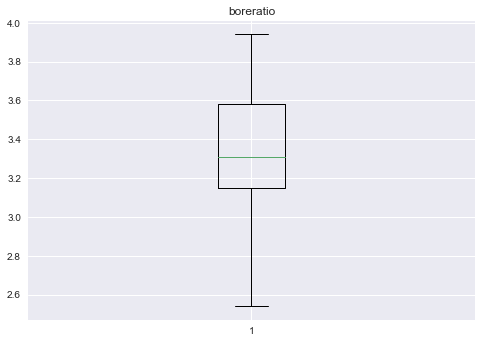

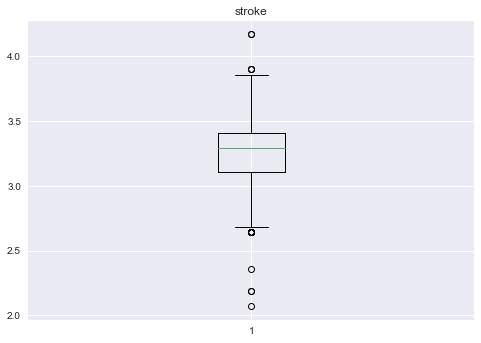

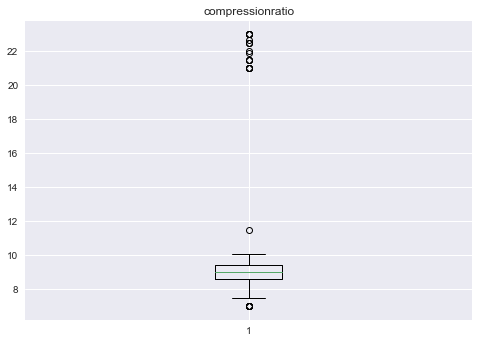

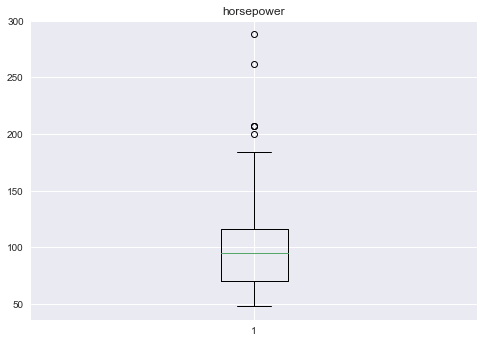

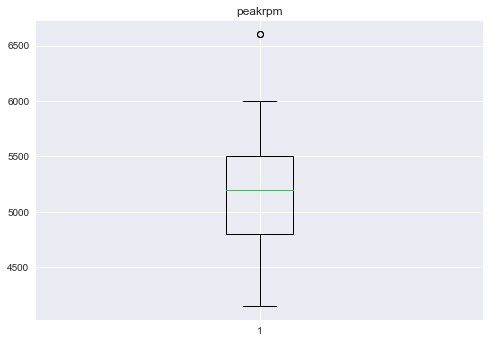

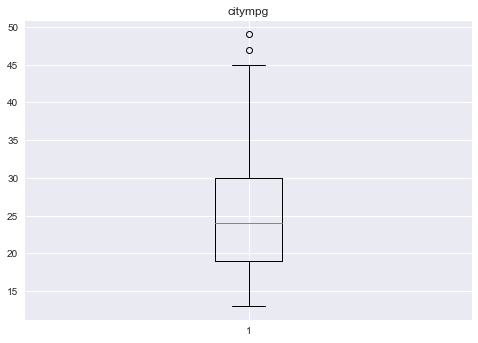

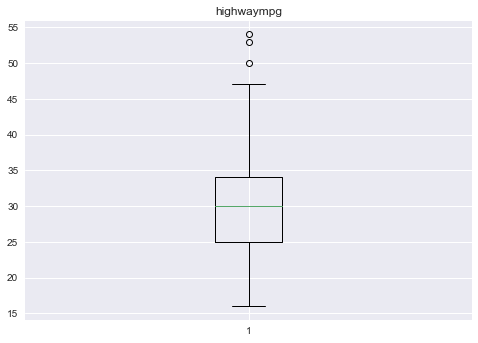

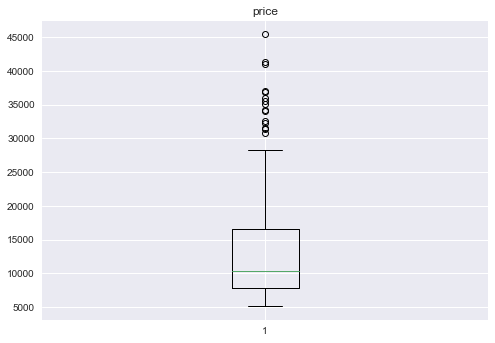

In [18]:
for i in list(df_numeric.columns):
    plt.boxplot(i, data = df_numeric)
    plt.title(i)
    plt.show()

- **Note**:  It is clear from the data analysis that few attribute values only playing big role on judging price but for time being we just go with all attributes for the model

### get dummies into play

In [19]:
data_clean.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [20]:
df_cat.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [21]:
final_data = pd.get_dummies(data_clean, columns= list(df_cat.columns),drop_first= True)
final_data.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [22]:
print('original data shape : {}'.format(data.shape))
print('final data shape : {}'.format(final_data.shape))

original data shape : (205, 26)
final data shape : (205, 44)


### scaling / data normalization 

In [23]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
final_data[list(df_numeric.columns)[:-1]] = ms.fit_transform(final_data[list(df_numeric.columns)[:-1]])

In [24]:
final_data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0,0,0,0,0,0,0,1,0,0
2,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,...,0,0,0,0,0,0,0,1,0,0
3,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,...,0,0,0,0,0,0,0,1,0,0
4,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,...,0,0,0,0,0,0,0,1,0,0


In [25]:
X_data = final_data.drop(columns= 'price')
y_data = final_data['price']

In [26]:
X = X_data.iloc[:].values
y = y_data.iloc[:].values

### Traing and testing

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Model building

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [29]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
xg_model = xgb.XGBRegressor()
xg_model.fit(X_train,y_train)

[11:32:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### Training scores

In [30]:
print('linear model score: {}'.format(lr_model.score(X_train, y_train)))
print('decison model score: {}'.format(dt_model.score(X_train, y_train)))
print('rf model score: {}'.format(rf_model.score(X_train, y_train)))
print('xg boost model score: {}'.format(xg_model.score(X_train, y_train)))

linear model score: 0.9523701791971928
decison model score: 0.9984642634434308
rf model score: 0.989550672380349
xg boost model score: 0.9910582849447906


### Testing scores

In [31]:
print('linear model score: {}'.format(lr_model.score(X_test, y_test)))
print('decison model score: {}'.format(dt_model.score(X_test, y_test)))
print('rf model score: {}'.format(rf_model.score(X_test, y_test)))
print('xg boost model score: {}'.format(xg_model.score(X_test, y_test)))

linear model score: 0.8668850854613052
decison model score: 0.8580258829521091
rf model score: 0.9060487570779383
xg boost model score: 0.8995730380732091


### Predictions

In [32]:
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xg = xg_model.predict(X_test)

### Error metrics

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('linear reg metrics', '\n')
print('mae score : {}'.format(mean_absolute_error(y_test, y_pred_lr)))
print('mse score : {}'.format(mean_squared_error(y_test, y_pred_lr)))
print('rmse score : {}'.format(np.sqrt(mean_squared_error(y_test, y_pred_lr))))
print('R2 score : {}'.format(r2_score(y_test, y_pred_lr)))

linear reg metrics 

mae score : 2021.1532366033402
mse score : 10305271.908643696
rmse score : 3210.182535097295
R2 score : 0.8668850854613052


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('decision tree metrics', '\n')
print('mae score : {}'.format(mean_absolute_error(y_test, y_pred_dt)))
print('mse score : {}'.format(mean_squared_error(y_test, y_pred_dt)))
print('rmse score : {}'.format(np.sqrt(mean_squared_error(y_test, y_pred_dt))))
print('R2 score : {}'.format(r2_score(y_test, y_pred_dt)))

decision tree metrics 

mae score : 2118.256097560976
mse score : 10991119.103658536
rmse score : 3315.2856745171352
R2 score : 0.8580258829521091


In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('randomforest metrics', '\n')
print('mae score : {}'.format(mean_absolute_error(y_test, y_pred_rf)))
print('mse score : {}'.format(mean_squared_error(y_test, y_pred_rf)))
print('rmse score : {}'.format(np.sqrt(mean_squared_error(y_test, y_pred_rf))))
print('R2 score : {}'.format(r2_score(y_test, y_pred_rf)))

randomforest metrics 

mae score : 1877.1563624390244
mse score : 7273363.077474247
rmse score : 2696.917328631756
R2 score : 0.9060487570779383


In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('xgboost metrics', '\n')
print('mae score : {}'.format(mean_absolute_error(y_test, y_pred_xg)))
print('mse score : {}'.format(mean_squared_error(y_test, y_pred_xg)))
print('rmse score : {}'.format(np.sqrt(mean_squared_error(y_test, y_pred_xg))))
print('R2 score : {}'.format(r2_score(y_test, y_pred_xg)))

xgboost metrics 

mae score : 1847.8918635670732
mse score : 7774689.659690601
rmse score : 2788.313049083729
R2 score : 0.8995730380732091


- **Note** : feature importance will be greatly depend on business lines so the objective here so to have an understanding of how each tree based model will end up showing

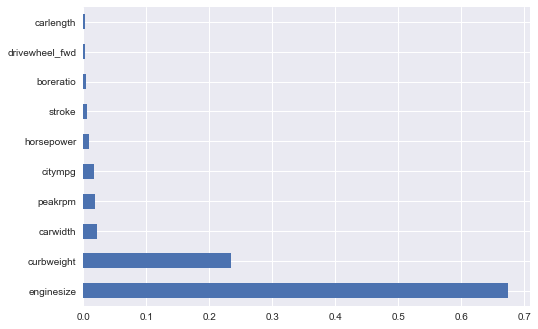

In [37]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(dt_model.feature_importances_, index=X_data.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

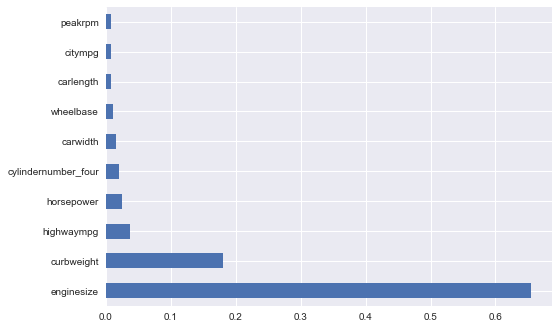

In [38]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_model.feature_importances_, index=X_data.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

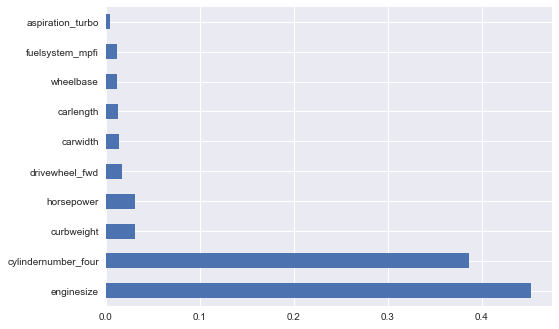

In [39]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(xg_model.feature_importances_, index=X_data.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### we have many columns so lets introduce PCA (dimensionality reduction technique)

In [40]:
final_data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0,0,0,0,0,0,0,1,0,0
2,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,...,0,0,0,0,0,0,0,1,0,0
3,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,...,0,0,0,0,0,0,0,1,0,0
4,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,...,0,0,0,0,0,0,0,1,0,0


In [53]:
# Applying PCA
# 95% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [54]:
explained_variance

array([0.28658111, 0.17733621, 0.11654625, 0.07802976, 0.06222152,
       0.05626312, 0.04921821, 0.03942255, 0.03160371, 0.02255812,
       0.0221103 , 0.02028992])

In [55]:
pca.explained_variance_

array([0.96108848, 0.59472095, 0.39085359, 0.26168336, 0.20866828,
       0.18868598, 0.16505992, 0.13220886, 0.10598732, 0.0756517 ,
       0.07414988, 0.06804497])

In [56]:
X_train

array([[ 0.74449598, -0.28385909, -0.54672433, ...,  0.88820684,
         0.07280423,  0.1021315 ],
       [ 1.8442694 , -0.13857172, -0.56478642, ...,  0.08985287,
        -0.20699883,  0.54599844],
       [-0.51335465,  0.90888019, -0.0625812 , ...,  0.19397855,
        -0.36556419,  0.15904927],
       ...,
       [ 1.42329598, -0.32716694, -0.01015127, ...,  0.01408584,
         0.00947792,  0.16105022],
       [ 1.90402559, -0.01809508, -0.56874157, ..., -0.25417254,
         0.0137065 , -0.17861414],
       [ 0.58247944,  0.72555385,  0.06938473, ..., -0.16278742,
        -0.16647284,  0.2141177 ]])

In [57]:
X_train.shape

(164, 12)

In [49]:
# Applying PCA
# 99% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [50]:
explained_variance

array([0.28406553, 0.17577957, 0.11552321, 0.07734483, 0.06167535,
       0.05576925, 0.04878618, 0.03907651, 0.0313263 , 0.02236011,
       0.02191622, 0.02011181, 0.01459689, 0.01312739, 0.00976297])

In [51]:
pca.explained_variance_

array([0.96108848, 0.59472095, 0.39085359, 0.26168336, 0.20866828,
       0.18868598, 0.16505992, 0.13220886, 0.10598732, 0.0756517 ,
       0.07414988, 0.06804497, 0.04938616, 0.04441433, 0.03303138])

In [52]:
X_train.shape

(164, 15)

In [45]:
# pca = PCA()
# # prepare transform on dataset
# pca.fit(final_data)
# # apply transform to dataset
# transformed = pca.transform(final_data)

In [46]:
# pd.DataFrame(transformed)

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,218.289497,0.774969,1.083223,-0.003807,-0.034376,-0.316756,-0.170749,0.347023,0.584623,-0.127016,...,0.030991,-0.033570,-0.019651,0.001614,-0.015251,-0.011410,0.032363,-0.001476,-7.633896e-16,-7.897560e-16
1,3223.289482,0.789479,0.845309,-0.027650,0.017253,-0.270371,-0.217146,0.416575,0.627306,-0.071625,...,0.013066,-0.038012,-0.035247,-0.013896,-0.005425,-0.004666,0.029751,-0.001912,-6.662451e-16,-5.954670e-16
2,3223.289541,1.320424,0.856645,-0.102478,0.126820,-0.470496,0.642236,-0.766886,-0.299953,0.162873,...,-0.175754,0.079632,-0.034686,-0.107500,-0.027455,0.007667,0.000247,-0.025454,5.539984e-17,-1.259991e-17
3,673.289411,-0.633936,-0.174044,-0.663105,-0.697292,0.113690,0.106350,0.107434,0.251438,0.181584,...,-0.016441,-0.024796,-0.028099,-0.051819,0.005989,0.036217,-0.012596,-0.036717,1.317277e-16,2.857725e-16
4,4173.289487,-0.489010,0.053087,-0.566979,-0.525342,-0.057238,0.108100,-0.457300,-0.183904,-0.574820,...,0.068802,0.019590,-0.023979,0.000722,-0.008878,0.026975,-0.006042,0.005363,-6.256136e-17,-3.248501e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,3568.289499,-0.695025,0.669268,-0.251331,-0.403839,-0.104869,-0.741624,0.019054,-0.108445,0.243391,...,0.020144,-0.049684,0.033156,-0.024222,0.014820,0.003668,0.006122,-0.002071,1.247888e-16,3.412837e-16
201,5768.289504,-0.722860,0.521755,0.109884,-0.600390,0.135908,-0.618810,0.489241,-0.509579,-0.079816,...,0.047079,-0.015627,0.018163,-0.046178,-0.044339,-0.008174,-0.012054,-0.018567,4.856113e-16,4.291124e-17
202,8208.289569,-0.367886,0.876196,-0.607365,0.249041,-0.495123,0.536831,-0.465798,-0.464789,0.140377,...,0.048208,-0.080445,-0.078109,-0.073510,0.043132,-0.015916,0.038589,0.038438,1.525444e-16,5.678903e-17
203,9193.289507,-1.098320,-0.293362,1.377927,0.039189,-0.575926,0.246666,-0.713622,-0.354563,-0.321580,...,-0.005162,-0.031117,-0.006321,0.031294,0.057417,0.020364,-0.016107,-0.004841,4.678561e-16,1.143146e-15


In [47]:
# pca.explained_variance_ratio_

array([9.99999955e-01, 9.51341201e-09, 6.19893220e-09, 5.31418480e-09,
       3.90885427e-09, 3.28615115e-09, 2.79028283e-09, 2.23208898e-09,
       1.88438070e-09, 1.47393702e-09, 1.22508075e-09, 1.06169152e-09,
       1.04961124e-09, 7.37798359e-10, 6.13756259e-10, 5.48707672e-10,
       5.06715560e-10, 4.28077809e-10, 3.29006804e-10, 2.91667711e-10,
       2.29952281e-10, 2.05236754e-10, 1.69403506e-10, 1.62340846e-10,
       1.33543271e-10, 1.17878875e-10, 8.81403509e-11, 7.93771224e-11,
       7.13750993e-11, 6.61833161e-11, 5.75876459e-11, 5.56150563e-11,
       4.15730323e-11, 3.19346353e-11, 3.00573436e-11, 2.48921452e-11,
       1.74801638e-11, 1.37743094e-11, 1.10858302e-11, 6.99845237e-12,
       4.11576817e-12, 3.13388355e-12, 9.92015148e-33, 9.92015148e-33])

In [48]:
# pca.explained_variance_

array([6.38217622e+07, 6.07162746e-01, 3.95626795e-01, 3.39160654e-01,
       2.49469979e-01, 2.09727967e-01, 1.78080775e-01, 1.42455858e-01,
       1.20264503e-01, 9.40692621e-02, 7.81868157e-02, 6.77590266e-02,
       6.69880423e-02, 4.70875936e-02, 3.91710078e-02, 3.50194922e-02,
       3.23394814e-02, 2.73206814e-02, 2.09977949e-02, 1.86147482e-02,
       1.46759604e-02, 1.30985719e-02, 1.08116307e-02, 1.03608793e-02,
       8.52296725e-03, 7.52323788e-03, 5.62527277e-03, 5.06598806e-03,
       4.55528482e-03, 4.22393605e-03, 3.67534521e-03, 3.54945106e-03,
       2.65326430e-03, 2.03812479e-03, 1.91831272e-03, 1.58866064e-03,
       1.11561491e-03, 8.79100737e-04, 7.07517253e-04, 4.46653583e-04,
       2.62675589e-04, 2.00009980e-04, 6.33121577e-25, 6.33121577e-25])